# Reptation

Here we implement a self-avoiding walk with the reptation method for state generation. This is much faster than the brute force collision method. 

In [1]:
! swig -c++ -python swig/reptation.i
! python swig/setup_reptation.py build_ext --inplace

running build_ext
building '_reptation' extension
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/include/python3.7m -c swig/reptation_wrap.cxx -o build/temp.linux-x86_64-3.7/swig/reptation_wrap.o -I./ -std=c++11 -O3
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/include/python3.7m -c reptation.cpp -o build/temp.linux-x86_64-3.7/reptation.o -I./ -std=c++11 -O3
x86_64-linux-gnu-g++ -pthread -shared -Wl,-O1 -Wl,-Bsymbolic-functions -Wl,-Bsymbolic-functions -Wl,-z,relro -Wl,-Bsymbolic-functions -Wl,-z,relro -g -fstack-protector-strong -Wfor

In [2]:
import sys
import os
sys.path.append( os.path.abspath("swig") )

In [3]:
import reptation
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='html5')


In [14]:
n_steps = 40
n_walks = 20
config = reptation.Reptation.STAIR
r = reptation.Reptation(n_steps, n_walks, config, True)
r.run()
r2av_v = r.get_r2av()
stdDev_v = r.get_stdDev()
successPercent_v = r.get_successPercent()
for i in range(len(r2av_v)):
    r2av = r2av_v[i]
    stdDev = stdDev_v[i]
    failedPercent = 1. - successPercent_v[i]
    print( " Mean square distance <r^2> = " , r2av , "\n"
             , " Standard deviation         = " , stdDev , "\n"
             , " Percentage failed walks    = " , failedPercent)

 Mean square distance <r^2> =  1.0 
  Standard deviation         =  0.0 
  Percentage failed walks    =  0.0
 Mean square distance <r^2> =  2.4 
  Standard deviation         =  0.8000000000000004 
  Percentage failed walks    =  0.0
 Mean square distance <r^2> =  5.4 
  Standard deviation         =  2.4979991993593584 
  Percentage failed walks    =  0.0
 Mean square distance <r^2> =  6.8 
  Standard deviation         =  2.6381811916545854 
  Percentage failed walks    =  0.0
 Mean square distance <r^2> =  5.0 
  Standard deviation         =  2.8284271247461903 
  Percentage failed walks    =  0.25
 Mean square distance <r^2> =  18.5 
  Standard deviation         =  6.160357132504575 
  Percentage failed walks    =  0.09999999999999998
 Mean square distance <r^2> =  14.4 
  Standard deviation         =  8.511169132381285 
  Percentage failed walks    =  0.0
 Mean square distance <r^2> =  21.6 
  Standard deviation         =  7.787168933572713 
  Percentage failed walks    =  0.05000000

In [17]:
class AnimatedScatter(object):
    """An animated scatter plot using matplotlib.animations.FuncAnimation."""
    def __init__(self, snakes):
        self.snakes = snakes
        self.stream = self.data_stream()
        
        # Setup the figure and axes...
        self.fig, self.ax = plt.subplots()
        # Then setup FuncAnimation.
        self.ani = animation.FuncAnimation(self.fig, self.update, interval=100, frames=500,
                                           init_func=self.setup_plot, blit=True)

    def setup_plot(self):

        """Initial drawing of the scatter plot."""
        x, y = next(self.stream).T
        self.scat = self.ax.scatter(x, y, animated=True)
        self.ax.axis([-30, 30, -30, 30])

        # For FuncAnimation's sake, we need to return the artist we'll be using
        # Note that it expects a sequence of artists, thus the trailing comma.
        return self.scat,
    

    def data_stream(self):
        
        i = 0
        while True:
            if i >= len(self.snakes):
                i = 0
            snake = self.snakes[i]
            x = [0.] * len(snake)
            y = [0.] * len(snake)            
            for islither,slither in enumerate(snake):
                x[islither] = slither[0]
                y[islither] = slither[1]
            i += 1
            yield np.c_ [x,y]
            

    def update(self, i):
        """Update the scatter plot."""
        data = next(self.stream)

        # Set x and y data...
        self.scat.set_offsets(data)

        # We need to return the updated artist for FuncAnimation to draw..
        # Note that it expects a sequence of artists, thus the trailing comma.
        return self.scat,

In [18]:
snakes_plot = []
for snake in r.get_snakes():
    vals = []
    for joint in snake : 
        vals.append( [joint.x, joint.y] )
    snakes_plot.append(vals)

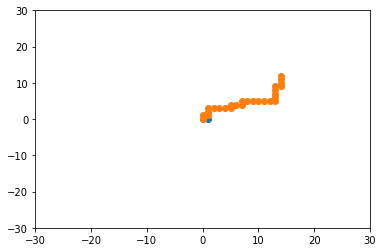

In [19]:
a = AnimatedScatter(snakes=snakes_plot)        
HTML(a.ani.to_html5_video())